#### License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"> CC BY  - Creative Commons Attribution 4.0 International License</a>.

#### Preliminaries

In [1]:
import os
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import skimage.color as skl
plt.rcParams.update({'figure.max_open_warning': 0})

#### Load seismic data

In [2]:
data_folder = "../data"

Data from the [F3 3D](https://terranubis.com/datainfo/Netherlands-Offshore-F3-Block-Complete) ([CC BY-SA license](https://creativecommons.org/licenses/by-sa/3.0/)).

In [3]:
seis_file = os.path.join(data_folder,'../data/f3_inline296.dat')
data = np.loadtxt(seis_file).T

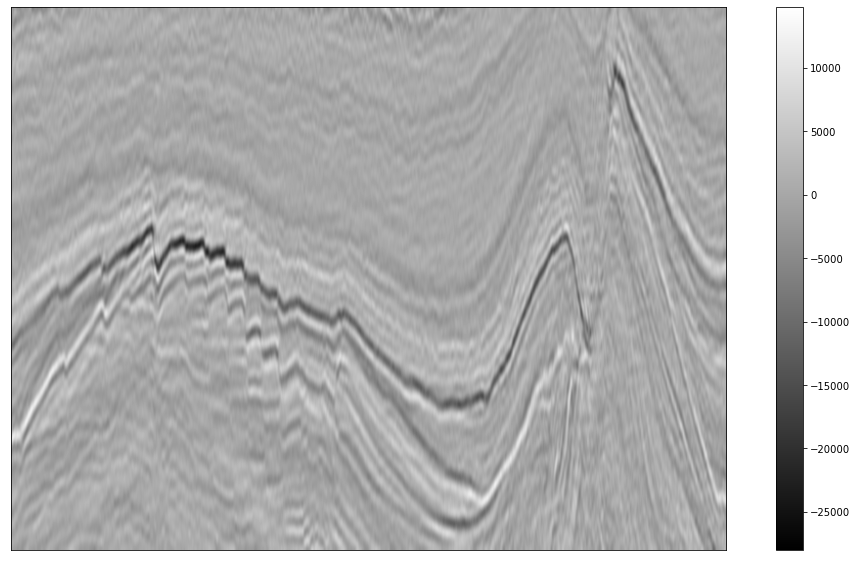

In [4]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data, cmap='gray', aspect = 4, interpolation = 'bicubic')
plt.colorbar()
plt.show()

#### Normalize data and convert from single channel to to RGB

In [5]:
data_n=(data-data.min())/(data.max()-data.min())
data_rgb= np.stack((data_n,)*3, axis=-1) # 3 equal R, G, and B channels

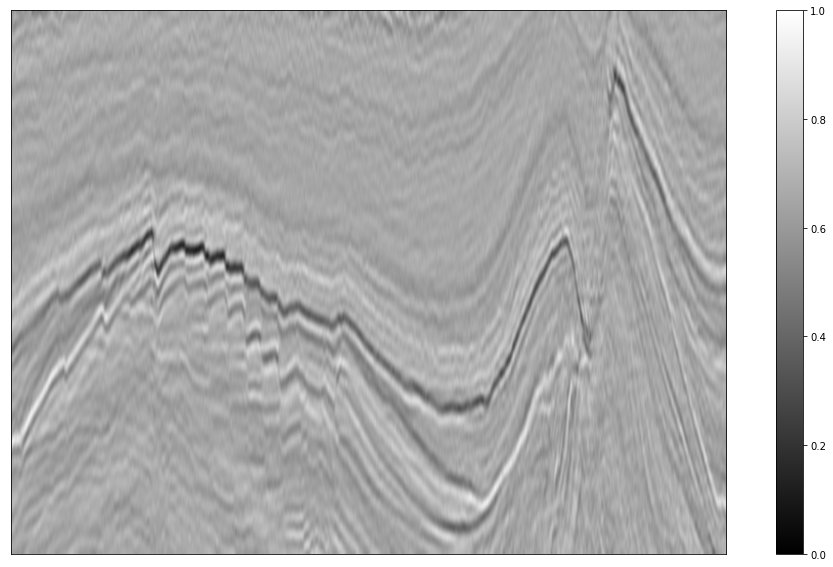

In [6]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data_rgb, cmap='gray', aspect = 4, interpolation = 'bicubic')
plt.colorbar()
plt.show()


In [7]:
cmaps = ['gray', 'spring', 'cool','bwr', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 
         'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 
         'tab20b', 'tab20c', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot',
         'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

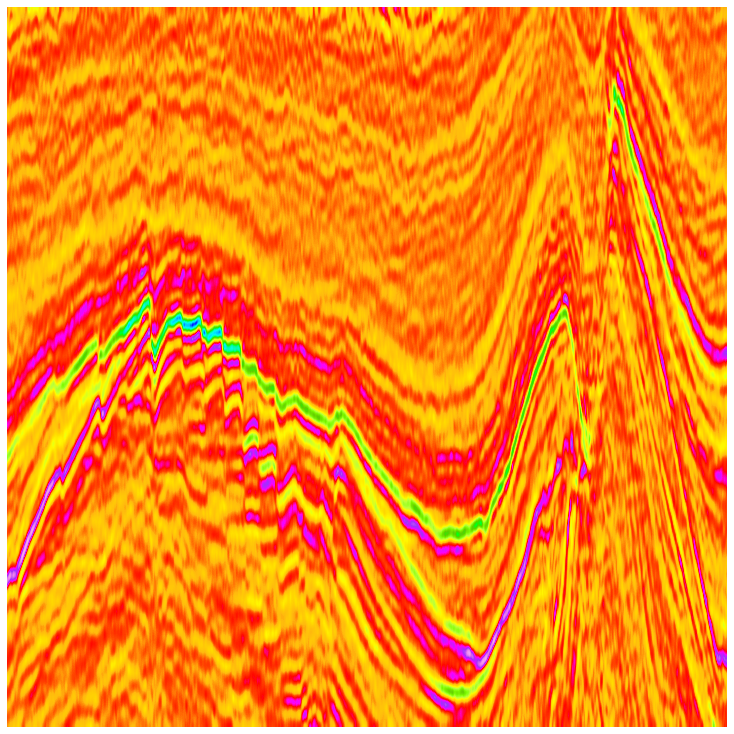

In [8]:
fig = plt.figure()
fig.set_size_inches((10,10))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.set_cmap(cmaps[-1])
ax.imshow(data, aspect='auto', interpolation = 'bicubic');
fig.canvas.draw();
# Now we can save it to a numpy array.
# Joe Kington rocks: https://stackoverflow.com/a/7821917/1034648
mat = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
mat = mat.reshape(fig.canvas.get_width_height()[::-1] + (3,));
#plt.clf()

In [9]:
mat.shape

(720, 720, 3)

In [10]:
data_rgb.shape

(133, 700, 3)

In [11]:
Lab= skl.rgb2lab(data_rgb)
Lab_cmapped = skl.rgb2lab(mat)

In [12]:
L=Lab[:,:,0]
L_cmapped=Lab_cmapped[:,:,0]

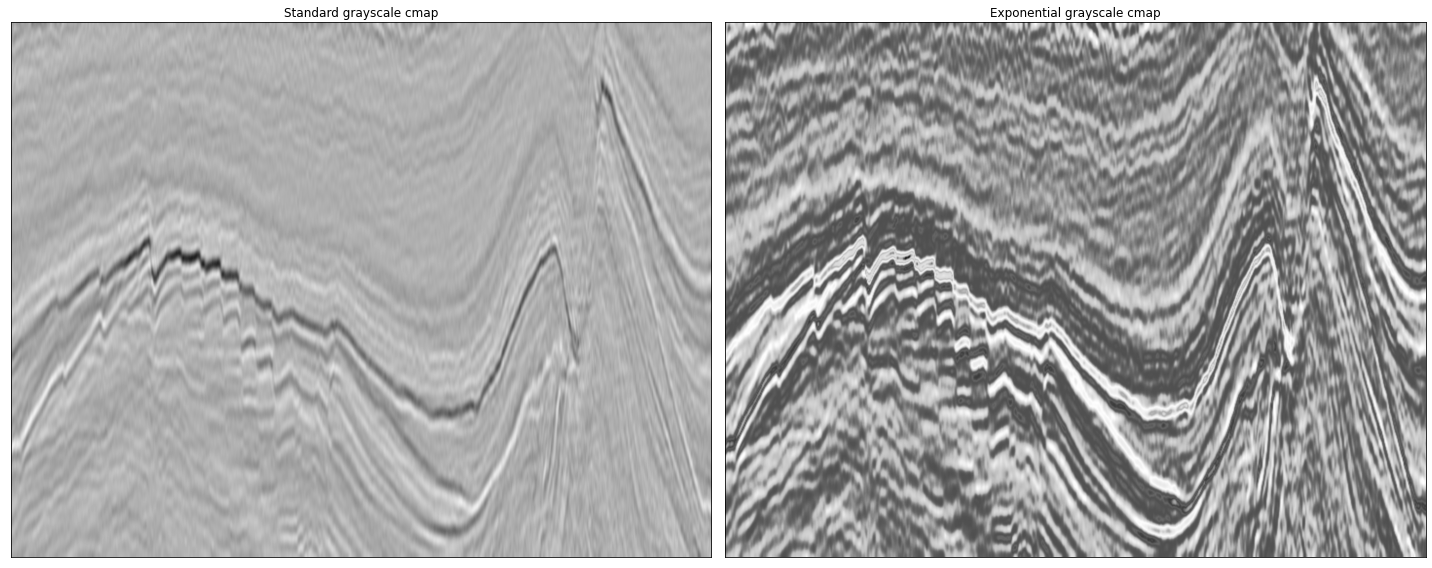

In [13]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1, 2, 1)
plt.imshow(L, cmap='gray', aspect = 'auto', interpolation = 'bicubic')

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Standard grayscale cmap')

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(L_cmapped, cmap='gray', aspect = 'auto', interpolation = 'bicubic')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Exponential grayscale cmap')

plt.tight_layout();

In [14]:
def Sobel_2d(data):
    '''2D Sobel filter'''
    dx = ndi.sobel(data, 0)  # horizontal derivative
    dy = ndi.sobel(data, 1)  # vertical derivative
    mag = np.hypot(dx, dy)      # magnitude
    mag *= 255.0 / np.max(mag)  # normalize
    return mag

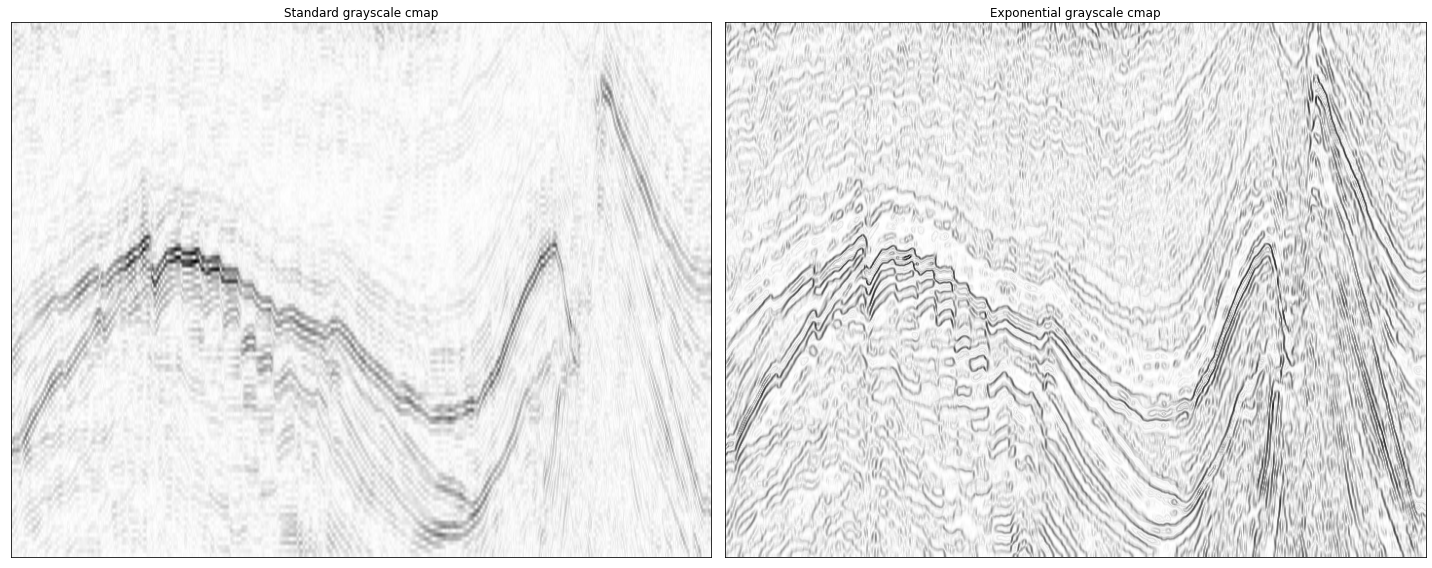

In [15]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1, 2, 1)
plt.imshow(Sobel_2d(L), cmap='gray_r', aspect = 'auto')

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Standard grayscale cmap')

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow((Sobel_2d(L_cmapped)), cmap='gray_r', aspect = 'auto')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Exponential grayscale cmap')

plt.tight_layout();